# Data Visualization with geographical Mapping
Basemap is a great tool for creating maps using python in a simple way. It’s a matplotlib extension, so it has got all its features to create data visualizations, and adds the geographical projections and some datasets to be able to plot coast lines, countries, and so on directly from the library. We will demonstrate different type of map projections, using basemap and Cartopy, two common library use for data visulization.

In [ ]:
# Import Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Map Projections

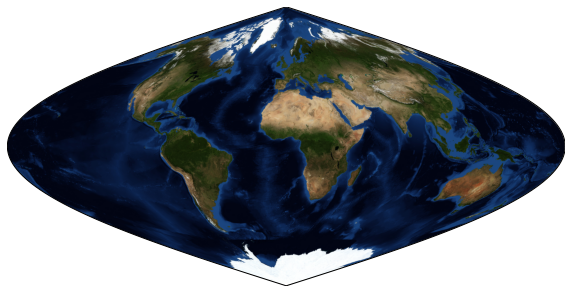

In [77]:
#Different type of Projections
#cyl, mill, cea and gall
plt.figure(figsize=(10, 10))
# m = Basemap(projection='cyl', resolution='c', llcrnrlat=-90, urcrnrlat=90,
#              llcrnrlon=-180, urcrnrlon=180,lat_ts=20)

# m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
#              llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

#sinu, moll, hammer, npstere, spstere, nplaea, splaea, npaeqd, spaeqd, robin, eck4, kav7, or mbtfpq, 
m = Basemap(projection='sinu', resolution=None,
            lon_0=0, lat_0=0, lat_1=45, lat_2=55,
             width=1.6E7, height=1.2E7)

m.bluemarble(scale=0.5);
        

# Map Background

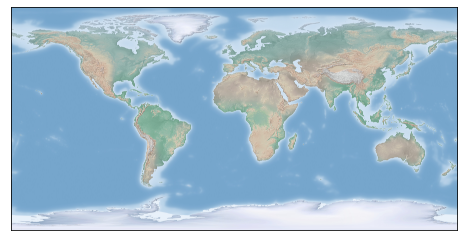

In [80]:
# Different map type 
plt.figure(figsize=(8, 8), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            lat_0=0, lon_0=0)
#m.etopo(scale=0.8)
#m.bluemarble()
m.shadedrelief()
#m.drawlsmask()

# Map with own function
You can create any styles for the map and apply it to any existing map projection. We are going to create latitude  and Longitude axis in a map using our own function.

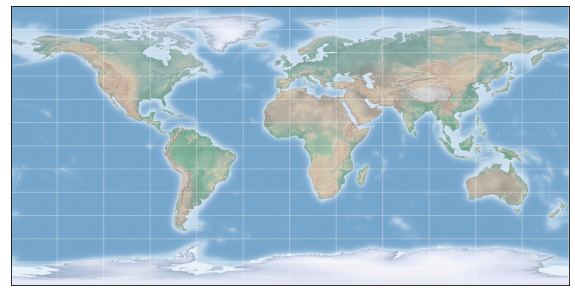

In [81]:
#More Cool Map
from itertools import chain
def draw_map(m,scale=0.8):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')
       
fig = plt.figure(figsize=(10, 10), edgecolor='w')
    
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)


# Location plotting using lat and lon
We can plot any location in the map by using exact lat and lon for any region.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


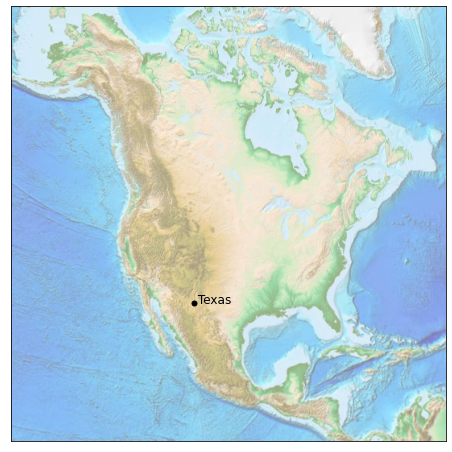

In [83]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-106.5, 31.75)
#x,y =m(-76.641,39.045)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Texas', fontsize=12);

# Draw a great circle from two different locations

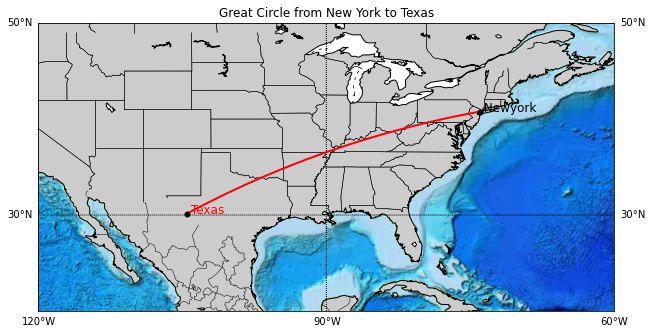

In [84]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# create new figure, axes instances.
fig=plt.figure(figsize=(10, 10))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-120.,llcrnrlat=20.,urcrnrlon=-60.,urcrnrlat=50.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='cyl',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
m.etopo()
# nylat, nylon are lat/lon of New York
nylat = 40.78; nylon = -73.98
# lonlat, lonlon are lat/lon of Texas.
texaslat = 30.16; texaslon=-104.5
# draw great circle route between NY and London
m.drawgreatcircle(nylon,nylat,texaslon,texaslat,linewidth=2,color='r')
m.drawcoastlines()
m.fillcontinents()
m.drawstates(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
x, y = m(nylon, nylat)
x1,y1=m(texaslon,texaslat)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x,y, ' Newyork', fontsize=12,color='k');
plt.plot(x1, y1, 'ok', markersize=5)
plt.text(x1,y1, ' Texas', fontsize=12,color='r');
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Great Circle from New York to Texas')
plt.show()

 

# Quiz time
Draw a great circle from Maryland to California using above code

# Country Map

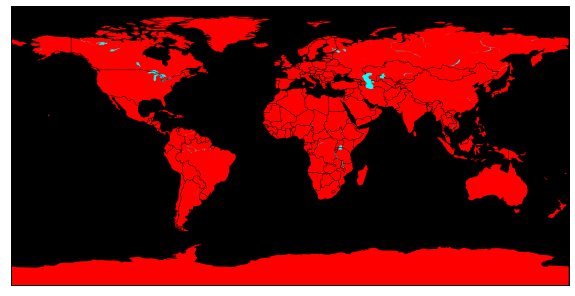

In [85]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
map = Basemap(projection='cyl', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='k')
map.fillcontinents(color='r',lake_color='aqua')

map.drawcountries()

plt.show()


# Day/Night Map

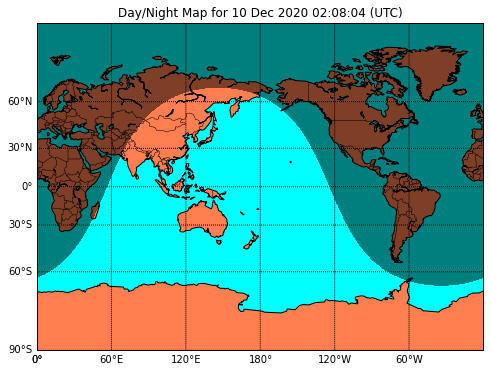

In [86]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime
# miller projection
fig = plt.figure(figsize=(8, 8))
map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()

# Weather model output Visualization

We are going to visualize the output file of a weather model named WRF. The file is in "netcdf" format and we are going to use "netcdf4" library to read it, and "cartopy" to visualize the data.

<xarray.DataArray 'T2' (south_north: 60, west_east: 73)>
array([[295.46326, 295.51535, 295.62946, ..., 300.94278, 300.77945,
        300.69965],
       [295.4938 , 295.54285, 295.54163, ..., 300.6877 , 300.5838 ,
        300.54755],
       [295.38425, 295.53595, 295.61703, ..., 300.53403, 300.40692,
        300.40237],
       ...,
       [264.96402, 265.8904 , 266.2061 , ..., 275.11346, 275.48965,
        275.85138],
       [265.53104, 268.3573 , 268.87814, ..., 274.93762, 275.26672,
        275.3964 ],
       [267.5814 , 269.3987 , 269.7208 , ..., 274.49414, 274.96906,
        275.17856]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -116.7278 -116.44635 ... -93.55795
    XLAT     (south_north, west_east) float32 23.283379 23.316154 ... 39.07185
    XTIME    float32 120.0
    Time     datetime64[ns] 2020-10-26T08:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-106.48855590820312, moad_cen_la...

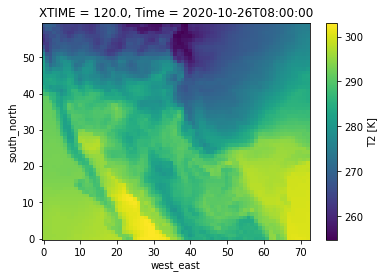

In [87]:
from netCDF4 import Dataset
import wrf
import xarray as xr
import numpy as np

import cartopy.crs as crs

import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import cartopy.feature as cfe

%matplotlib inline

# Reading the WRF data files

nc = Dataset('wrfout_d01_2020-10-26_06_00_00')
# t2 = wrf.getvar(nc, 'T2', timeidx=wrf.ALL_TIMES)
t2 = wrf.getvar(nc, 'T2', timeidx=2) # extract 3rd time instance (t=2) - slow....


# Quick Plot to check all is well
t2.plot()
t2

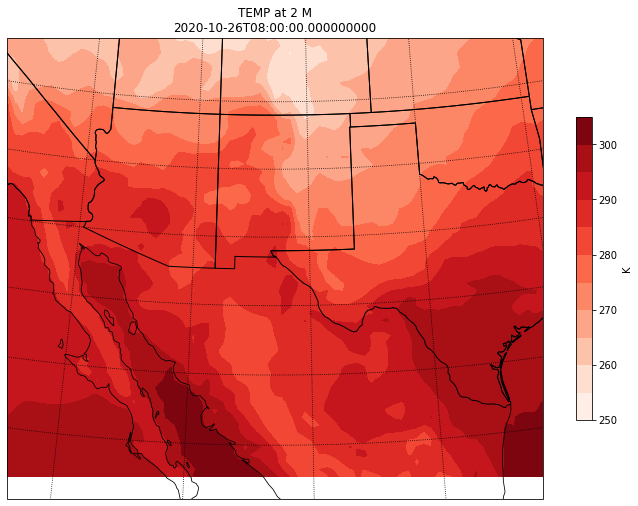

In [88]:
# Get the latitude and longitude points (use original data, rather than any processed data)
lats, lons = wrf.latlon_coords(t2)

# Get the cartopy mapping object (use original data, rather than any processed data)
cart_proj = wrf.get_cartopy(t2)

# Create a figure
fig = plt.figure(figsize=(12,9))

# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Add coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=1, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Plot contours
plt.contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(t2), 10, 
                transform=crs.PlateCarree(), cmap=get_cmap("Reds"))


# Add a color bar
cbar = plt.colorbar(ax=ax, shrink=.62)
cbar.set_label(t2.units)

# Set the map limits.  Not really necessary, but used for demonstration.
# ax.set_xlim(wrf.cartopy_xlim(t2))
# ax.set_ylim(wrf.cartopy_ylim(t2))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title(t2.description+'\n'+str(t2.Time.values))

print('')

In [89]:
# Four Panel Maps

#Load libraries
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr
from metpy.cbook import get_test_data


#Setup the map projection
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Function used to create the map subplots
def plot_background(ax):
    ax.set_extent([235., 290., 20., 55.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    return ax

# Open the example netCDF data
ds = xr.open_dataset(get_test_data('gfs_output.nc', False))
print(ds)


# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(ds['lon'], ds['lat'])


# Pull out the data
vort_500 = ds['vort_500'][0]
print(vort_500)
surface_temp = ds['temp'][0]
print(surface_temp)
precip_water = ds['precip_water'][0]
print(precip_water)
winds_300 = ds['winds_300'][0]
print(winds_300)


# Do unit conversions to what we wish to plot
vort_500 = vort_500 * 1e5
surface_temp.metpy.convert_units('degF')
precip_water.metpy.convert_units('inches')
winds_300.metpy.convert_units('knots')


<xarray.Dataset>
Dimensions:       (lat: 201, lon: 361, time: 1)
Coordinates:
  * lat           (lat) float32 65.0 64.75 64.5 64.25 ... 15.75 15.5 15.25 15.0
  * lon           (lon) float32 220.0 220.25 220.5 220.75 ... 309.5 309.75 310.0
  * time          (time) datetime64[ns] 2017-02-28T21:00:00
Data variables:
    temp          (time, lat, lon) float64 ...
    precip_water  (time, lat, lon) float64 ...
    heights_300   (time, lat, lon) float64 ...
    heights_500   (time, lat, lon) float64 ...
    vort_500      (time, lat, lon) float64 ...
    winds_300     (time, lat, lon) float64 ...
Attributes:
    title:     Test GFS Output Data
    subtitle:  For MetPy examples and tests
<xarray.DataArray 'vort_500' (lat: 201, lon: 361)>
array([[9.2e-05, 8.9e-05, 8.2e-05, ..., 4.4e-05, 5.8e-05, 7.1e-05],
       [7.2e-05, 7.3e-05, 8.1e-05, ..., 5.5e-05, 2.7e-05, 5.5e-05],
       [8.3e-05, 8.7e-05, 7.8e-05, ..., 8.3e-05, 7.8e-05, 9.7e-05],
       ...,
       [1.9e-05, 1.8e-05, 1.9e-05, ..., 8.0e

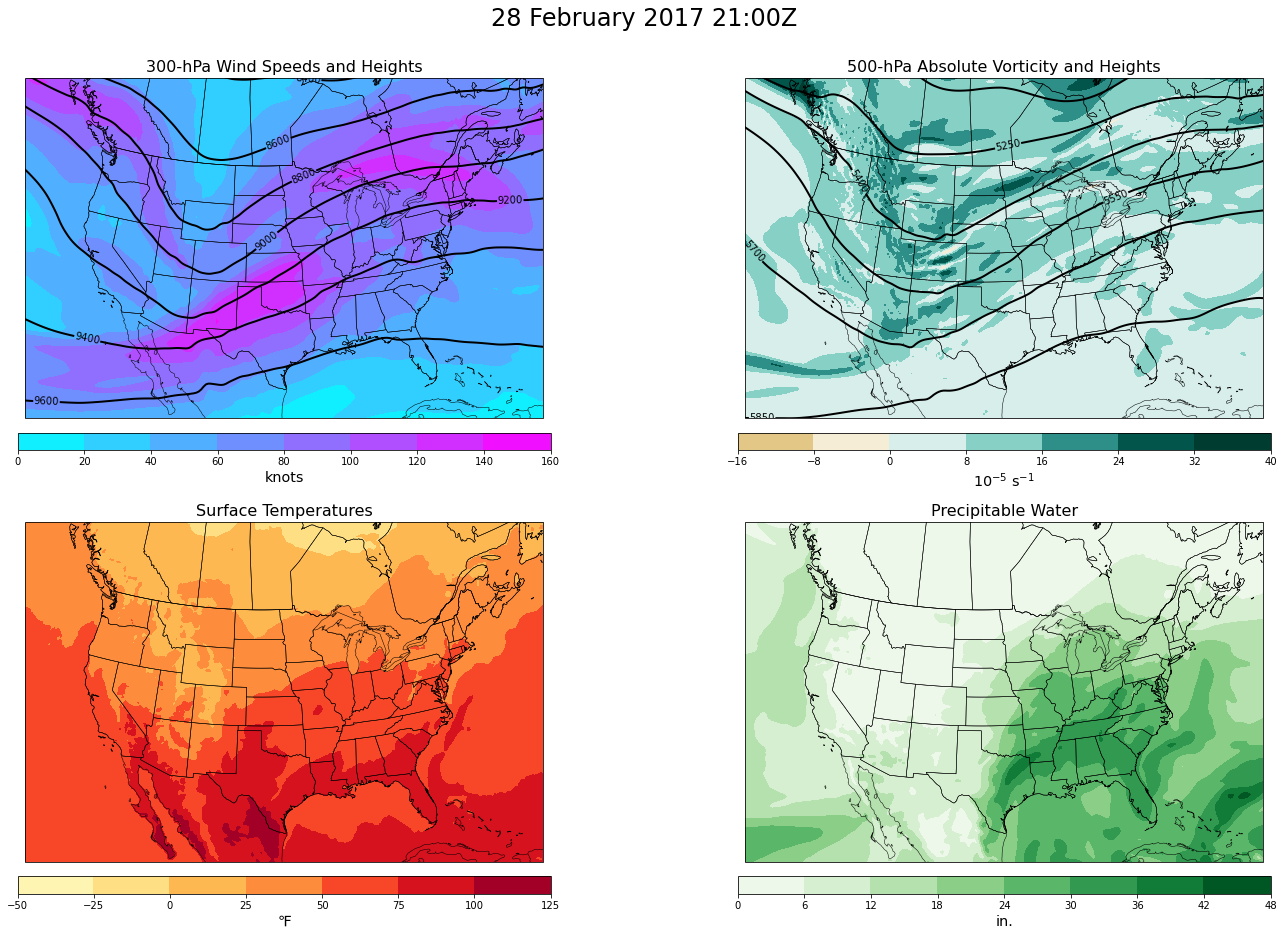

In [90]:
#Plotting the data

# Smooth the height data
heights_300 = ndimage.gaussian_filter(ds['heights_300'][0], sigma=1.5, order=0)
heights_500 = ndimage.gaussian_filter(ds['heights_500'][0], sigma=1.5, order=0)



# Create the figure and plot background on different axes
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(20, 13), constrained_layout=True,
                          subplot_kw={'projection': crs})
axlist = axarr.flatten()
for ax in axlist:
    plot_background(ax)

# Upper left plot - 300-hPa winds and geopotential heights
cf1 = axlist[0].contourf(lon_2d, lat_2d, winds_300, cmap='cool', transform=ccrs.PlateCarree())
c1 = axlist[0].contour(lon_2d, lat_2d, heights_300, colors='black', linewidths=2,
                       transform=ccrs.PlateCarree())
axlist[0].clabel(c1, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
axlist[0].set_title('300-hPa Wind Speeds and Heights', fontsize=16)
cb1 = fig.colorbar(cf1, ax=axlist[0], orientation='horizontal', shrink=0.74, pad=0)
cb1.set_label('knots', size='x-large')

# Upper right plot - 500mb absolute vorticity and geopotential heights
cf2 = axlist[1].contourf(lon_2d, lat_2d, vort_500, cmap='BrBG', transform=ccrs.PlateCarree(),
                         zorder=0, norm=plt.Normalize(-32, 32))
c2 = axlist[1].contour(lon_2d, lat_2d, heights_500, colors='k', linewidths=2,
                       transform=ccrs.PlateCarree())
axlist[1].clabel(c2, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
axlist[1].set_title('500-hPa Absolute Vorticity and Heights', fontsize=16)
cb2 = fig.colorbar(cf2, ax=axlist[1], orientation='horizontal', shrink=0.74, pad=0)
cb2.set_label(r'$10^{-5}$ s$^{-1}$', size='x-large')

# Lower left plot - surface temperatures
cf3 = axlist[2].contourf(lon_2d, lat_2d, surface_temp, cmap='YlOrRd',
                         transform=ccrs.PlateCarree(), zorder=0)
axlist[2].set_title('Surface Temperatures', fontsize=16)
cb3 = fig.colorbar(cf3, ax=axlist[2], orientation='horizontal', shrink=0.74, pad=0)
cb3.set_label(u'\N{DEGREE FAHRENHEIT}', size='x-large')

# Lower right plot - precipitable water entire atmosphere
cf4 = axlist[3].contourf(lon_2d, lat_2d, precip_water, cmap='Greens',
                         transform=ccrs.PlateCarree(), zorder=0)
axlist[3].set_title('Precipitable Water', fontsize=16)
cb4 = fig.colorbar(cf4, ax=axlist[3], orientation='horizontal', shrink=0.74, pad=0)
cb4.set_label('in.', size='x-large')

# Set height padding for plots
fig.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)

# Set figure title
fig.suptitle(ds['time'][0].dt.strftime('%d %B %Y %H:%MZ').values, fontsize=24)

# Display the plot
plt.show()

# Time Series Analysis
In this example, we are going to use a csv (comma separated value) file which contain minimum temperature for a given day. We have 10 years of data stored in two columns. Snippet of the CSV file is given below for better understanding.
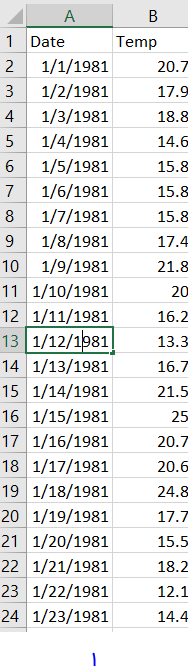

In [102]:
#Load the data

from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.shape

(3650,)

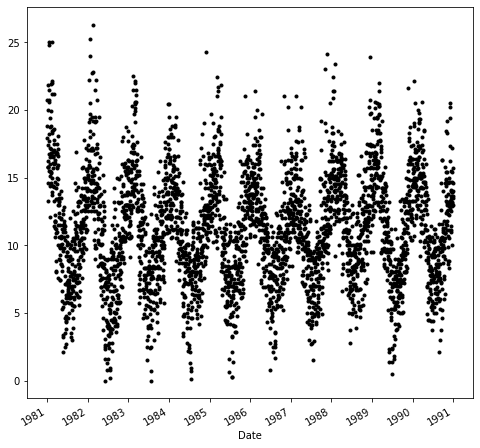

In [93]:
#Plot the data
fig = plt.figure(figsize=(8, 8))
series.plot(style='k.')
pyplot.show()

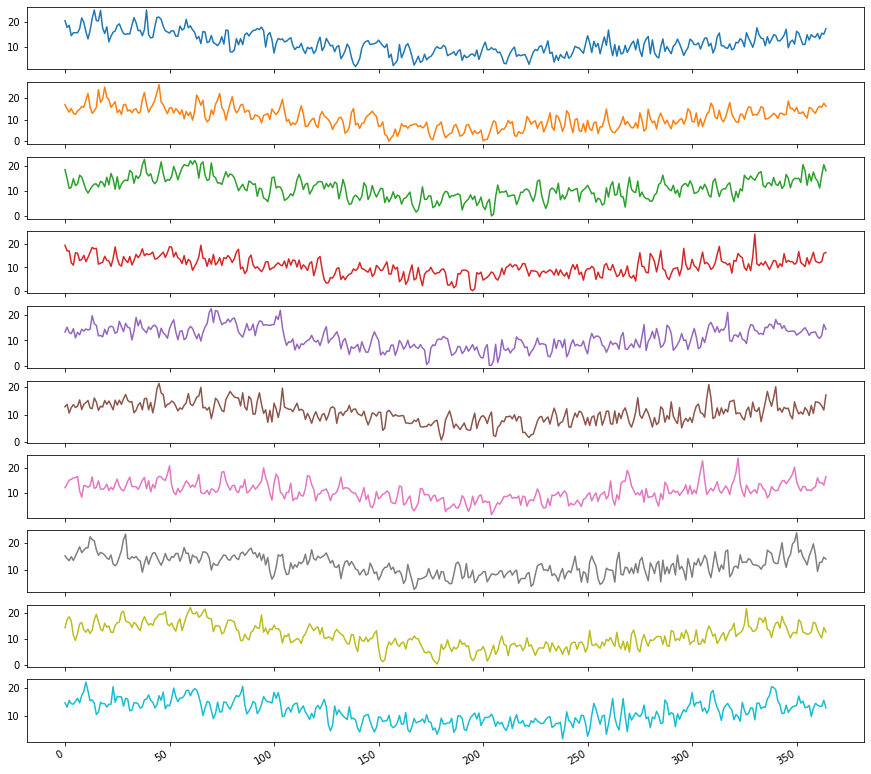

In [94]:
#Plot data individually
from pandas import Grouper
from pandas import DataFrame
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values

years.plot(subplots=True, legend=False,figsize=(15,15))
pyplot.show()

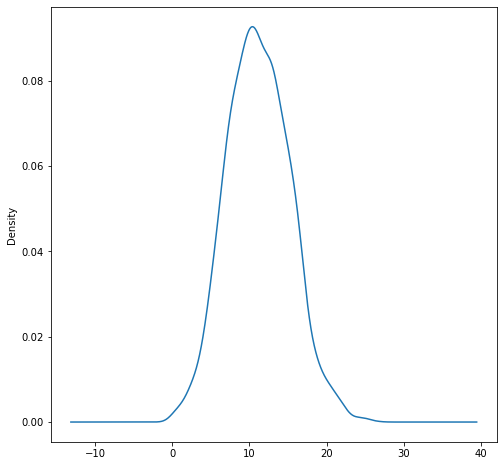

In [96]:
#Histogram and Distribuition
fig = plt.figure(figsize=(8, 8))

#series.hist()
series.plot(kind='kde')

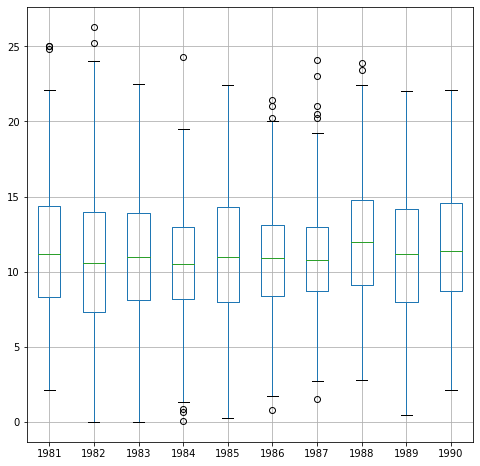

In [97]:
fig = plt.figure(figsize=(8, 8))
years.boxplot()

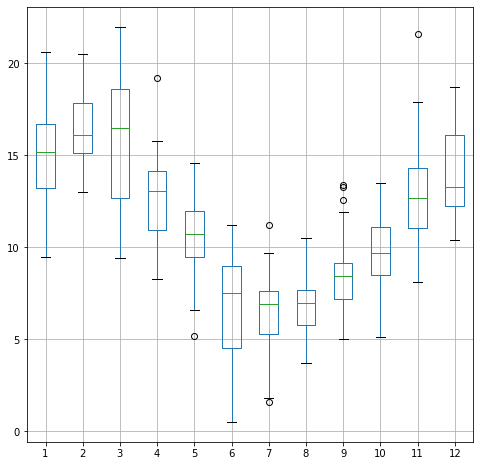

In [99]:
from pandas import concat
one_year = series['1989']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
fig = plt.figure(figsize=(8, 8))
months.boxplot()
pyplot.show()

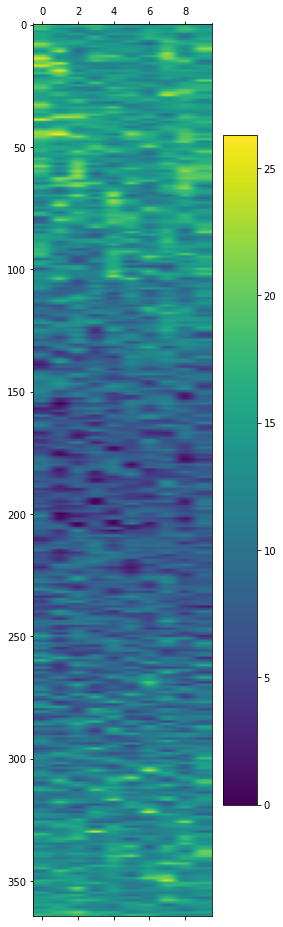

<Figure size 288x288 with 0 Axes>

In [100]:
years = years
pyplot.matshow(years, interpolation=None, aspect='auto')

pyplot.colorbar()
fig = plt.figure(figsize=(4, 4))
pyplot.show()

# Meteogram

Plots time series data as a meteogram.


C:\Users\Administrator\anaconda3\lib\site-packages\metpy\xarray.py:677: MetpyDeprecationWarning: The dewpoint_rh function was deprecated in version 0.12. This function has been renamed dewpoint_from_relative_humidity.
  return func(*args, **kwargs)
<ipython-input-101-3c30dd4cd7af>:70: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax7.set_yticks(np.arange(45, 405, 90), ['NE', 'SE', 'SW', 'NW'])


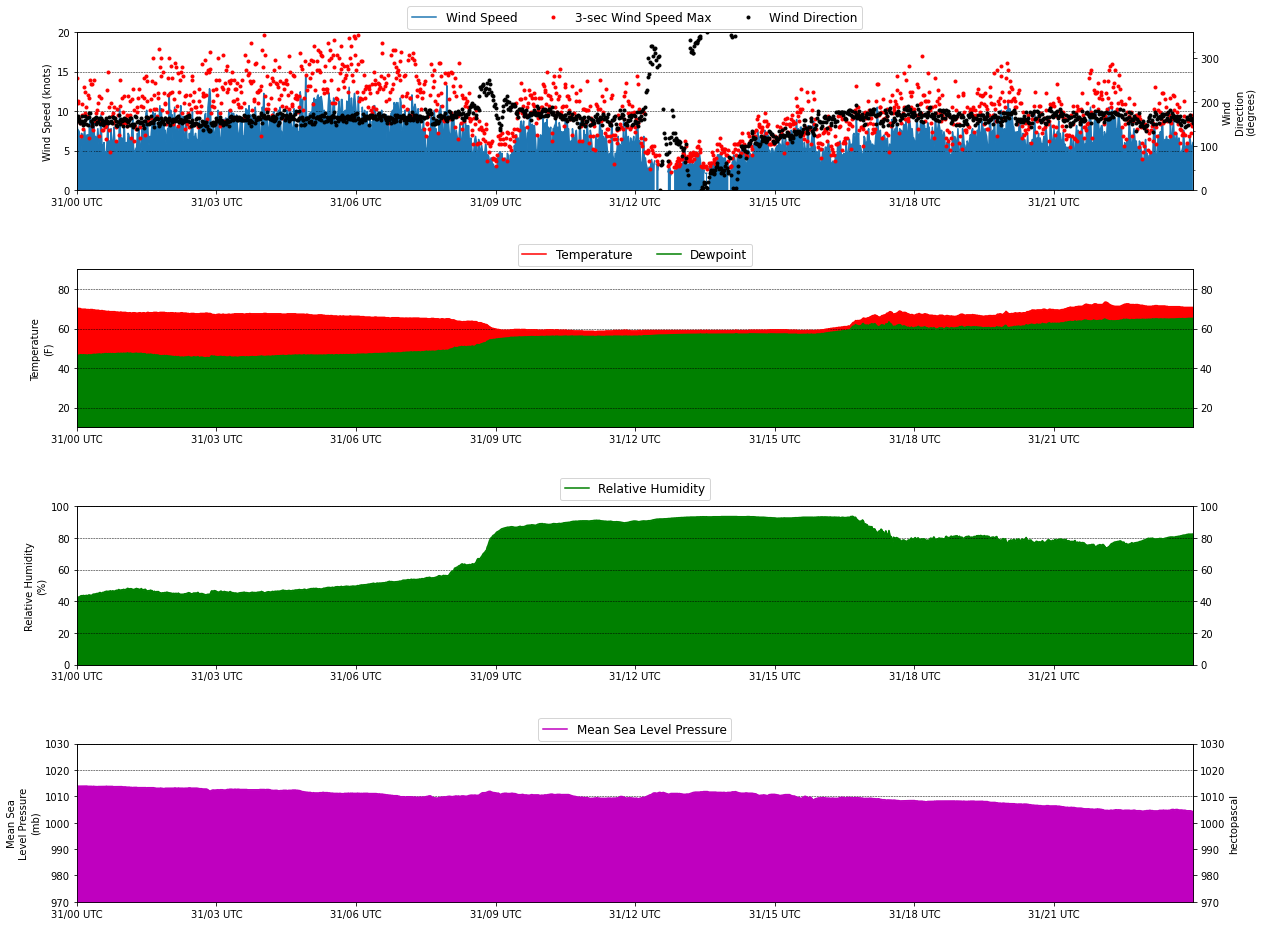

In [101]:
import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from metpy.calc import dewpoint_rh
from metpy.cbook import get_test_data
from metpy.units import units


def calc_mslp(t, p, h):
    return p * (1 - (0.0065 * h) / (t + 0.0065 * h + 273.15)) ** (-5.257)


# Make meteogram plot
class Meteogram(object):
    """ Plot a time series of meteorological data from a particular station as a
    meteogram with standard variables to visualize, including thermodynamic,
    kinematic, and pressure. The functions below control the plotting of each
    variable.
   """

    def __init__(self, fig, dates, probeid, time=None, axis=0):
        """
        Required input:
            fig: figure object
            dates: array of dates corresponding to the data
            probeid: ID of the station
        Optional Input:
            time: Time the data is to be plotted
            axis: number that controls the new axis to be plotted (FOR FUTURE)
        """
        if not time:
            time = dt.datetime.utcnow()
        self.start = dates[0]
        self.fig = fig
        self.end = dates[-1]
        self.axis_num = 0
        self.dates = mpl.dates.date2num(dates)
        self.time = time.strftime('%Y-%m-%d %H:%M UTC')
        self.title = 'Latest Ob Time: {0}\nProbe ID: {1}'.format(self.time, probeid)

    def plot_winds(self, ws, wd, wsmax, plot_range=None):
        """
        Required input:
            ws: Wind speeds (knots)
            wd: Wind direction (degrees)
            wsmax: Wind gust (knots)
        Optional Input:
            plot_range: Data range for making figure (list of (min,max,step))
        """
        # PLOT WIND SPEED AND WIND DIRECTION
        self.ax1 = fig.add_subplot(4, 1, 1)
        ln1 = self.ax1.plot(self.dates, ws, label='Wind Speed')
        self.ax1.fill_between(self.dates, ws, 0)
        self.ax1.set_xlim(self.start, self.end)
        if not plot_range:
            plot_range = [0, 20, 1]
        self.ax1.set_ylabel('Wind Speed (knots)', multialignment='center')
        self.ax1.set_ylim(plot_range[0], plot_range[1], plot_range[2])
        self.ax1.grid(b=True, which='major', axis='y', color='k', linestyle='--',
                      linewidth=0.5)
        ln2 = self.ax1.plot(self.dates, wsmax, '.r', label='3-sec Wind Speed Max')

        ax7 = self.ax1.twinx()
        ln3 = ax7.plot(self.dates, wd, '.k', linewidth=0.5, label='Wind Direction')
        ax7.set_ylabel('Wind\nDirection\n(degrees)', multialignment='center')
        ax7.set_ylim(0, 360)
        ax7.set_yticks(np.arange(45, 405, 90), ['NE', 'SE', 'SW', 'NW'])
        lines = ln1 + ln2 + ln3
        labs = [line.get_label() for line in lines]
        ax7.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d/%H UTC'))
        ax7.legend(lines, labs, loc='upper center',
                   bbox_to_anchor=(0.5, 1.2), ncol=3, prop={'size': 12})

    def plot_thermo(self, t, td, plot_range=None):
        """
        Required input:
            T: Temperature (deg F)
            TD: Dewpoint (deg F)
        Optional Input:
            plot_range: Data range for making figure (list of (min,max,step))
        """
        # PLOT TEMPERATURE AND DEWPOINT
        if not plot_range:
            plot_range = [10, 90, 2]
        self.ax2 = fig.add_subplot(4, 1, 2, sharex=self.ax1)
        ln4 = self.ax2.plot(self.dates, t, 'r-', label='Temperature')
        self.ax2.fill_between(self.dates, t, td, color='r')

        self.ax2.set_ylabel('Temperature\n(F)', multialignment='center')
        self.ax2.grid(b=True, which='major', axis='y', color='k', linestyle='--',
                      linewidth=0.5)
        self.ax2.set_ylim(plot_range[0], plot_range[1], plot_range[2])

        ln5 = self.ax2.plot(self.dates, td, 'g-', label='Dewpoint')
        self.ax2.fill_between(self.dates, td, self.ax2.get_ylim()[0], color='g')

        ax_twin = self.ax2.twinx()
        ax_twin.set_ylim(plot_range[0], plot_range[1], plot_range[2])
        lines = ln4 + ln5
        labs = [line.get_label() for line in lines]
        ax_twin.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d/%H UTC'))

        self.ax2.legend(lines, labs, loc='upper center',
                        bbox_to_anchor=(0.5, 1.2), ncol=2, prop={'size': 12})

    def plot_rh(self, rh, plot_range=None):
        """
        Required input:
            RH: Relative humidity (%)
        Optional Input:
            plot_range: Data range for making figure (list of (min,max,step))
        """
        # PLOT RELATIVE HUMIDITY
        if not plot_range:
            plot_range = [0, 100, 4]
        self.ax3 = fig.add_subplot(4, 1, 3, sharex=self.ax1)
        self.ax3.plot(self.dates, rh, 'g-', label='Relative Humidity')
        self.ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.22), prop={'size': 12})
        self.ax3.grid(b=True, which='major', axis='y', color='k', linestyle='--',
                      linewidth=0.5)
        self.ax3.set_ylim(plot_range[0], plot_range[1], plot_range[2])

        self.ax3.fill_between(self.dates, rh, self.ax3.get_ylim()[0], color='g')
        self.ax3.set_ylabel('Relative Humidity\n(%)', multialignment='center')
        self.ax3.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d/%H UTC'))
        axtwin = self.ax3.twinx()
        axtwin.set_ylim(plot_range[0], plot_range[1], plot_range[2])

    def plot_pressure(self, p, plot_range=None):
        """
        Required input:
            P: Mean Sea Level Pressure (hPa)
        Optional Input:
            plot_range: Data range for making figure (list of (min,max,step))
        """
        # PLOT PRESSURE
        if not plot_range:
            plot_range = [970, 1030, 2]
        self.ax4 = fig.add_subplot(4, 1, 4, sharex=self.ax1)
        self.ax4.plot(self.dates, p, 'm', label='Mean Sea Level Pressure')
        self.ax4.set_ylabel('Mean Sea\nLevel Pressure\n(mb)', multialignment='center')
        self.ax4.set_ylim(plot_range[0], plot_range[1], plot_range[2])

        axtwin = self.ax4.twinx()
        axtwin.set_ylim(plot_range[0], plot_range[1], plot_range[2])
        axtwin.fill_between(self.dates, p, axtwin.get_ylim()[0], color='m')
        axtwin.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d/%H UTC'))

        self.ax4.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), prop={'size': 12})
        self.ax4.grid(b=True, which='major', axis='y', color='k', linestyle='--',
                      linewidth=0.5)
        # OTHER OPTIONAL AXES TO PLOT
        # plot_irradiance
        # plot_precipitation


# set the starttime and endtime for plotting, 24 hour range
endtime = dt.datetime(2016, 3, 31, 22, 0, 0, 0)
starttime = endtime - dt.timedelta(hours=24)

# Height of the station to calculate MSLP
hgt_example = 292.


# Parse dates from .csv file, knowing their format as a string and convert to datetime
def parse_date(date):
    return dt.datetime.strptime(date.decode('ascii'), '%Y-%m-%d %H:%M:%S')


testdata = np.genfromtxt(get_test_data('timeseries.csv', False), names=True, dtype=None,
                         usecols=list(range(1, 8)),
                         converters={'DATE': parse_date}, delimiter=',')

# Temporary variables for ease
temp = testdata['T']
pres = testdata['P']
rh = testdata['RH']
ws = testdata['WS']
wsmax = testdata['WSMAX']
wd = testdata['WD']
date = testdata['DATE']

# ID For Plotting on Meteogram
probe_id = '0102A'

data = {'wind_speed': (np.array(ws) * units('m/s')).to(units('knots')),
        'wind_speed_max': (np.array(wsmax) * units('m/s')).to(units('knots')),
        'wind_direction': np.array(wd) * units('degrees'),
        'dewpoint': dewpoint_rh((np.array(temp) * units('degC')).to(units('K')),
                                np.array(rh) / 100.).to(units('degF')),
        'air_temperature': (np.array(temp) * units('degC')).to(units('degF')),
        'mean_slp': calc_mslp(np.array(temp), np.array(pres), hgt_example) * units('hPa'),
        'relative_humidity': np.array(rh), 'times': np.array(date)}

fig = plt.figure(figsize=(20, 16))
meteogram = Meteogram(fig, data['times'], probe_id)
meteogram.plot_winds(data['wind_speed'], data['wind_direction'], data['wind_speed_max'])
meteogram.plot_thermo(data['air_temperature'], data['dewpoint'])
meteogram.plot_rh(data['relative_humidity'])
meteogram.plot_pressure(data['mean_slp'])
fig.subplots_adjust(hspace=0.5)
plt.show()